# Визуализация аудио

На предыдущих занятиях мы научились работать с аудио, загружать и воспроизводить его. Конечно же аудио можно и нарисовать. Мы помним, что в компьютере аудио представлено как последовательность чисел, описывающих амплитуду звукового сигнала. Самый простой способ - нарисовать эту последовательность, отложив по горизонтальной оси моменты времени, а по вертикальной - амплитуду сигнала. Такой график можно построить средствами `matplotlib`, или других библиотек.

Для всевозможных манипуляций со звуком  и визуализации будем использовать библиотеку [`librosa`](https://librosa.github.io/librosa/index.html). В этой библиотеке множество полезных инструментов для работы со звуком. Подключим саму библиотеку `librosa`, модули для визуализации  `librosa.display` из нее, графики `matplotlib.pyplot`, средство для загрузки и воспроизведения звука `IPython.display`.


In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

## Временной график
Дальше будем работать со звуковым файлом 'test.wav', прослушаем его.

In [2]:
!wget https://github.com/neuralcomputer/ML_School/raw/main/test.wav

--2025-09-18 09:15:55--  https://github.com/neuralcomputer/ML_School/raw/main/test.wav
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/neuralcomputer/ML_School/main/test.wav [following]
--2025-09-18 09:15:56--  https://raw.githubusercontent.com/neuralcomputer/ML_School/main/test.wav
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 405584 (396K) [audio/wav]
Saving to: ‘test.wav’

test.wav            100%[===================>] 396.08K  --.-KB/s    in 0.01s   

2025-09-18 09:15:56 (26.6 MB/s) - ‘test.wav’ saved [405584/405584]



In [3]:
ipd.Audio('test.wav')

`librosa` позволяет загрузить и отобразить график для этого файла.

Всегда помните, что для компьютера аудио это последовательность чисел, и мы должны сами указывать частоту дискретизации, которая показывает, как часто эти числа расположены на оси времени или загрузить из файла. Частота воспроизведения может отличаться от частоты записи и за этим нужно аккуратно следить, чтобы не возникло искажения звука.

Мы не обязаны использовать ту же частоту дискретизации, что и в файле, ведь при большой частоте и длительности звука в файле может быть очень много чисел, все их рисовать нет необходимости. Можно уменьшить частоту дискретизации данных и загружаемого файла, но, конечно, не забыть про это при воспроизведении.
Простейший способ уменьшить частоту в два раза - брать числа из последовательности не подряд, а через одно. Но можно использовать и другие способы изменения частоты (resampling), какие-то точней, какие-то быстрей. Изменение частоты может вносить искажения в звук. Мы будем пользоваться способом по умолчанию, каким бы он ни был.

Загрузка выполняется командой `load()`, которой мы указываем аргументы:

```
filename1, имя загружаемого файла
sr=22050, частота дискретизации, Гц
mono=True, преобразование в моно режим, полезно если у нас много каналов звука в файле
offset=0.0, смещение от начала звука, которое мы пропустим и не будем загружать, секунды
duration=200, длительность загружаемого звука, секунды
res_type='scipy', способ изменения частоты дискретизации.
```
Возвращает эта команда массив numpy (`ndarray`) с последовательностью чисел и частоту дискретизации для этого массива (обычно совпадает с `sr`, если указан).

Отображение выполняется командой `waveshow()` из модуля `display`, ее аргументы
```
data1, - данные (`ndarray`) для отображения
sr=sample_rate1, частота дискретизации данных (влияет на интерпретацию времени), Гц
```

Посмотрите, как выглядит звук! Наверняка вы сможете различить где начинается один слог, где другой, обратите внимание на промежутки между слогами, по этому графику можно распознать начало и длительность слогов, а это первый шаг к распознаванию речи.

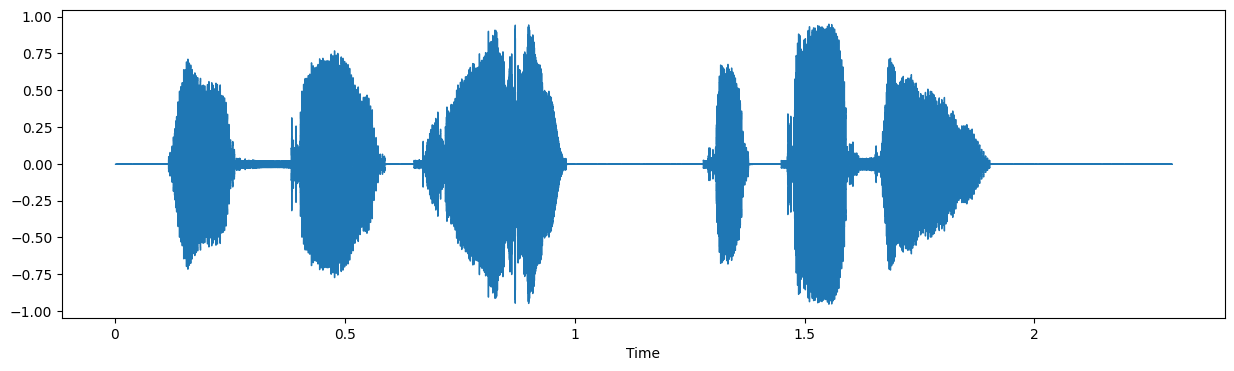

In [4]:
filename1 = 'test.wav'

plt.figure(figsize=(15,4))

data1,sample_rate1 = librosa.load(filename1,
                                  #sr=22050,
                                  sr=44100,
                                  mono=True,
                                  offset=0.0,
                                  duration=200,
                                  res_type='scipy')

librosa.display.waveshow(data1,
                         sr=sample_rate1)

ipd.Audio(data1,rate=sample_rate1)

Массив, который нам вернулся при загрузке - привычный нам массив numpy, можем посмотреть на него и другие численные характеристики аудио.

In [5]:
print(data1)
print(len(data1))
print(sample_rate1)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.0517578e-05 0.0000000e+00
 0.0000000e+00]
101385
44100


### Отрисовка через matplotlib.pyplot

Загруженные данные - массив numpy, конечно мы можем нарисовать их через `matplotlib.pyplot`.

In [6]:
import librosa
import matplotlib.pyplot as plt

In [7]:
signal, sr = librosa.load('test.wav') # загружаем (все прочие параметры по умолчанию)

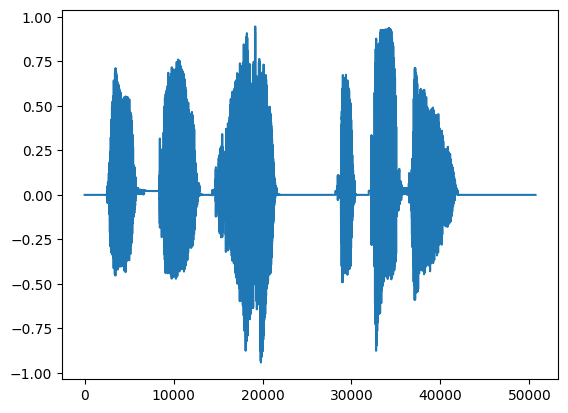

In [8]:
plt.plot(signal) # отображаем

### Добавление шума


В звуках часто присутствует шум. Шум может быть разный: шум толпы, водопада, крики, гудки автомобилей и прочее. Обычно шум мешает работе системе обработки звука, но иногда может наоборот помогать. Давайте добавим случайный шум к нашему звуку и посмотрим, как изменится график. Не забудем подключить numpy, чтобы работать с массивами.

Зададим уровень шума H, который определяет насколько сильный шум. Попробуйте разные значения, например H=0.1 и H=0.9. Если мы раньше на графике четко видели произносимые слоги, то при большом шуме их уже не видно, но, что удивительно, вы все равно слышите голос на фоне шума (если прислушаться), даже можете понять что там произносится. Так происходит потому, что ухо работает со звуком не как с временной последовательностью, а в другом представлении - в **частотном**.     

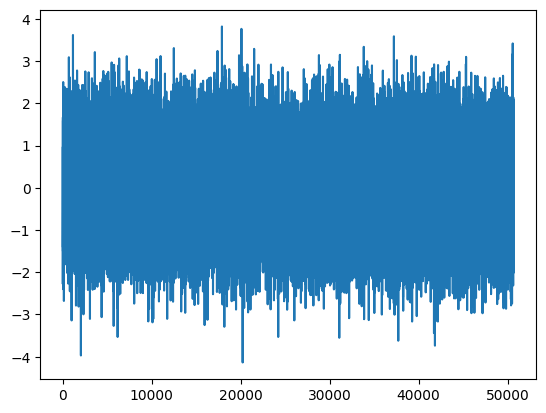

In [9]:
import numpy as np

#H=0.1 #
H=0.9 # попробуйте разный уровень шума
noise=np.random.normal(0, H, signal.shape[0]) #шум - случайная величина
signal_noise = signal+noise #
plt.plot(signal_noise) #
ipd.Audio(signal_noise,rate=sr) #

## Частотное представление и спектр

Любое колебание, а звук это колебание, можно представить как сумму синусоид разной частоты и амплитуды.  Ниже показано несколько примеров. Чем больше синусоид разной частоты, тем более сложное колебание можно создать.

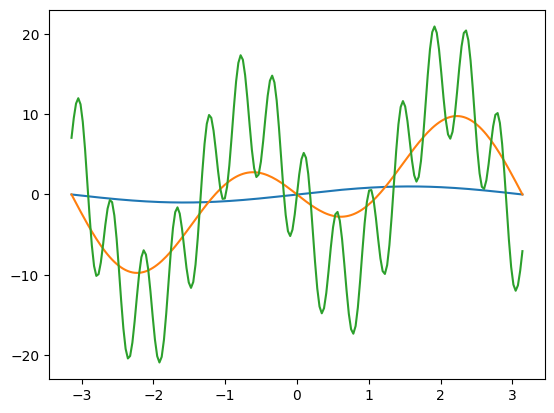

In [10]:
x = np.linspace(-np.pi, np.pi, 201)
y1=np.sin(x)
y2=5*np.sin(x)-6*np.sin(2*x)
y3=3*np.sin(x)-12*np.sin(2.2*x)+7.6*np.sin(14*x)
plt.plot(x,y1,x,y2,x,y3)

Если колебание представляет собой сумму синусоид разной амплитуды и частоты, то нам достаточно знать только эти амплитуды и частоты, а саму синусоиду мы всегда можем построить по этим параметрам. Для хранения одной синусоиды нам нужно всего два числа (амплитуда, частота), а все ее временные точки не нужны.  Значит нам не надо хранить все точечки колебания, достаточно узнать, какие в нем есть частоты и их амплитуды. Такой набор частот и их амплитуд и есть **частотное** представление колебаний.

Если колебание не периодическое (т.е. не повторяет самого себя точно), то частоты (и конечно амплитуды) будут со временем меняться. Но это тоже можно посчитать и представить наше колебание массивом частот и амплитуд, изменяющихся во времени. Часто частоты выбирают заранее, особенно для цифровых сигналов, которые используются в компьютерах (они привязаны к частоте дискретизации, нет смысла считать частоты больше чем частота дискретизации, такие сигналы просто не записать в компьютер). Для ограниченных по времени сигналов и частоты ограничены, колебания со слишком малыми частотами просто не успеют произойти за длительность сигнала. Зафиксировав частоты, нам осталось только посчитать их амплитуды, и как они изменялись во времени. Так получается **спектр**. Часто вместо амплитуд считают квадраты амплитуд или другие похожие значения, сейчас нам это не слишком важно.

Спектр сигнала можно посчитать и нарисовать (изображение спектра называют спектрограммой)!
Давайте сделаем это для нашего звука. Еще раз - спектр это массив амплитуд определенных частот, которые могут изменяться во времени, у нас представлен двумерным массивом.

Сначала нужно вычислить амплитуды частот, это сделает функция `stft()`. Амплитуды могут получиться *комплексными* числами, если вы не знаете что это, не беда, мы будем пользоваться только обычными привычными нам числами (их называют действительные), переведя комплексные в действительные с помощью команды  `abs()` (для действительных чисел это модуль числа, а для комплексных... тоже модуль, только комплексного числа).

Для отображения спектра используем команду `librosa.display.specshow()`, которой указываем что отображать и параметры отображения, часто, например,рисуют в логарифмических осях, но мы не будем.

Давайте построим спектр для нашего загруженного звука переменная (`signal`) и для звука с шумом (переменная `signal_noise`).

Посмотрите на них. Хоть шум появился и на спектре, основные частоты, самые яркие на спектрограмме, все равно заметны.

(1025, 100)


Text(0.5, 1.0, 'Спектр с шумом')

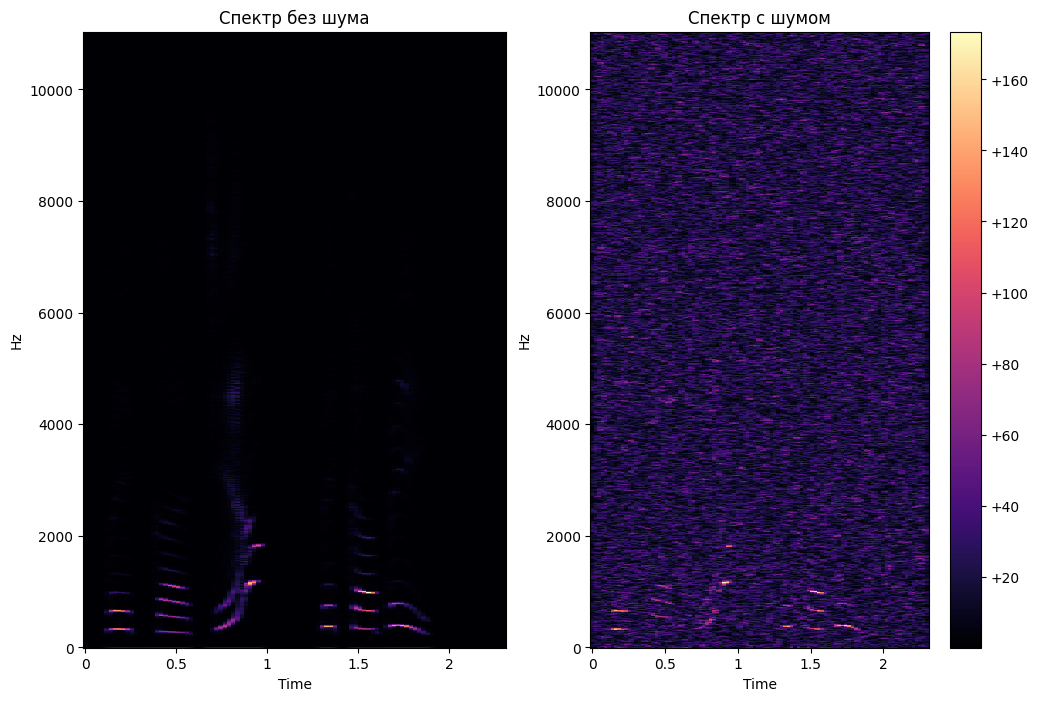

In [11]:
plt.figure(figsize=(12, 8)) # сделаем полотно
plt.subplot(1, 2, 1) # первый подграфик
D_compl=librosa.stft(signal)# считаем спектр чистого сигнала (он комплексный)
D=np.abs(D_compl) # берем только амплитуду комплексного числа
print(D_compl.shape) # посмотрим, что же такое спектр, это двумерный массив
librosa.display.specshow(D,# нарисуем спектр, массив, который отображать
                         x_axis='time', # временные отметки по горизонтальной оси
                         y_axis='linear') # вертикальная ось - линейная (а можно логарифмическую 'log')
plt.title('Спектр без шума') # название графика

# спектрограмма для звука с шумом
plt.subplot(1, 2, 2) # второй подграфик
D_compl=librosa.stft(signal_noise)
D=np.abs(D_compl)
librosa.display.specshow(D, x_axis='time',y_axis='linear')
plt.colorbar(format='%+2.0f') # нарисуем цветовую шкалу
plt.title('Спектр с шумом')

Что если нам не нравится шум? Неслышно ж ничего! Давайте его уберем. У нас есть спектр, самые важные частоты имеют самые большие амплитуды, давайте все остальное занулим, а потом из такого измененного спектра восстановим звук. Единственно, нам нужно будет восстанавливать сигнал из комплексного спектра, но это тоже массив, так что даже не понимая что такое комплексное число можем с ним работать.

При восстановлении сигнала могут возникнуть искажения, чтобы их как-то убрать, занулим частоты всего спектра, для частот, выше определенной. Ее значение мы подобрали вручную, чтобы восстановление было по-лучше.
Для получения сигнала из спектра используем функцию `librosa.istft()` которой передаем массив спектра.

/tmp/ipython-input-570579362.py:6: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(D_compl1, x_axis='time',y_axis='linear') # посмотрим на измененный спектр


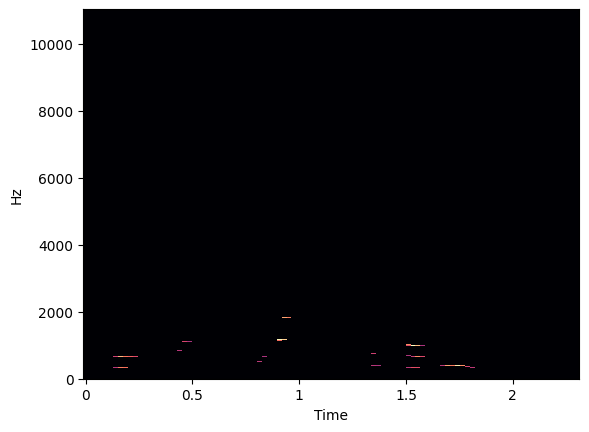

In [14]:
treshold=80 # порог для отсеивания коэффициентов
freq_max=200 # максимальная частота (в условных единицах)
D_compl1=D_compl.copy() # сделаем копию массива, чтобы не испортить
D_compl1[np.where(D<treshold)]=0 # найдем все эелменты которые меньше порога и заменим их нулями
D_compl1[freq_max:,:]=0 # заменим нулями все элементы для высоких частот, выше определенной
librosa.display.specshow(D_compl1, x_axis='time',y_axis='linear') # посмотрим на измененный спектр

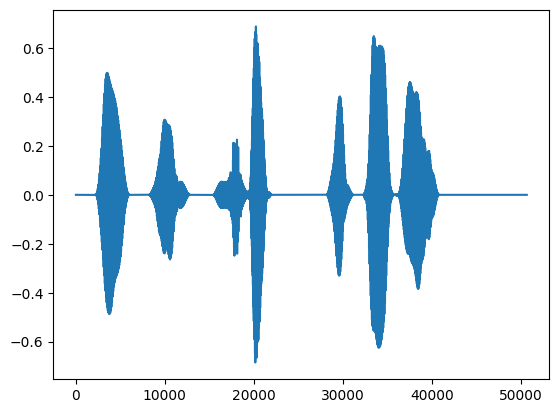

In [15]:
signal_reconstructed=librosa.istft(D_compl1)# преобразуем спектр в сигнал
plt.plot(signal_reconstructed) # рисуем его
ipd.Audio(signal_reconstructed,rate=sr) # слушаем

Конечно, при таком примитивном способе отсеивания шума у нас получились искажения в звуке, но все же шума нет, искажения не очень большие и понятно что произносится. На практике используют более сложные методы для отсеивания шума.

Представление в виде спектра (разных типов) это самое популярное представление для звука и часто используется.

# Обсуждение и задание
Опишите своими словами, что такое спектр.
Попробуйте изменять переменные `treshold` и `freq_max`, посмотрите, как они влияют на восстановление сигнала.